In [2]:
import pandas as pd
import pandas_datareader.data as web   # Package and modules for importing data; this code may change depending on pandas version
import datetime

# We will look at stock prices over the past year, starting at January 1, 2016
start = datetime.datetime(2016,1,1)
end = datetime.date.today()

# Let's get Apple stock data; Apple's ticker symbol is AAPL
# First argument is the series we want, second is the source ("yahoo" for Yahoo! Finance), third is the start date, fourth is the end date
apple = web.DataReader("AAPL", "yahoo", start, end)

type(apple)

pandas.core.frame.DataFrame

In [3]:
apple.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2015-12-31,107.010002,107.029999,104.820000,105.260002,100.927902,40635300
2016-01-04,102.610001,105.370003,102.000000,105.349998,101.014191,67649400
2016-01-05,105.750000,105.849998,102.410004,102.709999,98.482849,55791000
2016-01-06,100.559998,102.370003,99.870003,100.699997,96.555565,68457400
2016-01-07,98.680000,100.129997,96.430000,96.449997,92.480484,81094400


Populating the interactive namespace from numpy and matplotlib


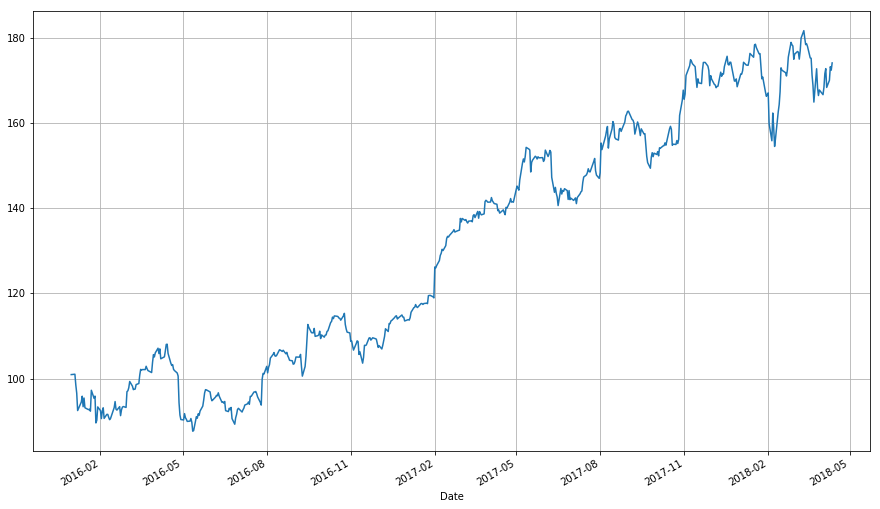

In [4]:
import matplotlib.pyplot as plt   # Import matplotlib
# This line is necessary for the plot to appear in a Jupyter notebook
%matplotlib inline
# Control the default size of figures in this Jupyter notebook
%pylab inline
pylab.rcParams['figure.figsize'] = (15, 9)   # Change the size of plots
 
apple["Adj Close"].plot(grid = True) # Plot the adjusted closing price of AAPL


In [11]:
#pandas and NumPy imports
import pandas as pd
from pandas import Series,DataFrame
import numpy as np

# For Visualization
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

# For reading stock data from yahoo
#from pandas.io.data import DataReader
import pandas_datareader.data as web

# For time stamps
from datetime import datetime

# For division in Python 3
from __future__ import division

In [12]:
# The tech stocks we'll use for this analysis
tech_list = ['AAPL','GOOG','MSFT','AMZN']

# Set up End and Start times for data grab
end = datetime.now()
start = datetime(end.year - 1,end.month,end.day)


#For loop for grabing yahoo finance data and setting as a dataframe

for stock in tech_list:   
    # Set DataFrame as the Stock Ticker
    # globals()[stock] = DataReader(stock,'yahoo',start,end)
    globals()[stock] = web.DataReader(stock,'yahoo',start,end)

In [13]:
# Summary Stats for Apple stocks
AAPL.describe()

,Open,High,Low,Close,Adj Close,Volume
count,252.000000,252.000000,252.000000,252.000000,252.000000,2.520000e+02
mean,161.326151,162.581865,160.066945,161.346270,160.250898,2.985697e+07
std,11.161173,11.339123,11.083562,11.167615,11.732320,1.228586e+07
min,141.220001,141.880005,140.449997,140.679993,138.489166,1.402670e+07
25%,153.595005,154.115006,152.287499,153.274998,151.587696,2.126205e+07
50%,160.000000,161.209999,158.724998,159.930001,158.710053,2.633415e+07
75%,172.262497,173.472500,170.837498,171.942505,171.523178,3.508818e+07
max,182.589996,183.500000,180.210007,181.720001,181.720001,8.659380e+07


In [14]:
# General Info about Apple Stock
AAPL.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 252 entries, 2017-04-12 to 2018-04-12
Data columns (total 6 columns):
Open         252 non-null float64
High         252 non-null float64
Low          252 non-null float64
Close        252 non-null float64
Adj Close    252 non-null float64
Volume       252 non-null int64
dtypes: float64(5), int64(1)
memory usage: 13.8 KB


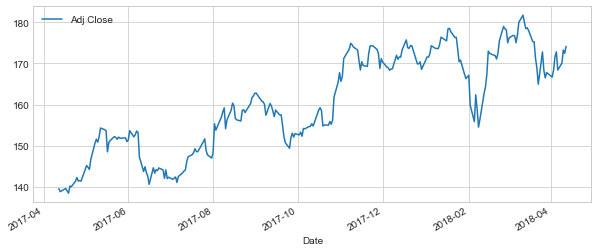

In [15]:
# Historical view of the closing price of Apple stock
AAPL['Adj Close'].plot(legend=True,figsize=(10,4))

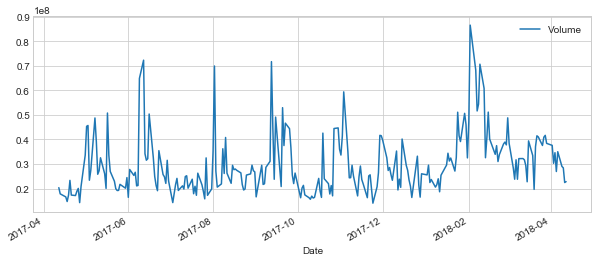

In [16]:
# Historical view of the total volume of Apple stock traded each day
AAPL['Volume'].plot(legend=True,figsize=(10,4))

In [17]:
# Calculation of moving averages for 10, 20 and 50 days of Apple stocks
ma_day = [10,20,50]

for ma in ma_day:
    column_name = "MA for %s days" %(str(ma))
    AAPL[column_name]=pd.rolling_mean(AAPL['Adj Close'],ma)

/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:6: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=10,center=False).mean()
  
/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:6: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=20,center=False).mean()
  
/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:6: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=50,center=False).mean()
  


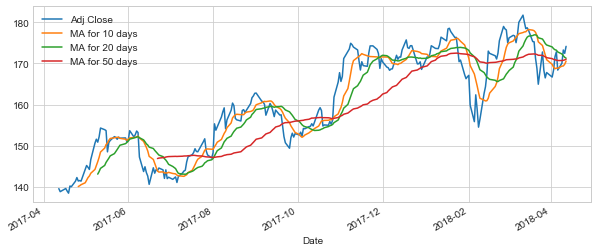

In [18]:
# Hostorical view of the moving averages of Closing Price of Apple Stock
AAPL[['Adj Close','MA for 10 days','MA for 20 days','MA for 50 days']].plot(subplots=False,figsize=(10,4))

In [19]:
#Calculation to find he percent change for each day of Apple stock
AAPL['Daily Return'] = AAPL['Adj Close'].pct_change()

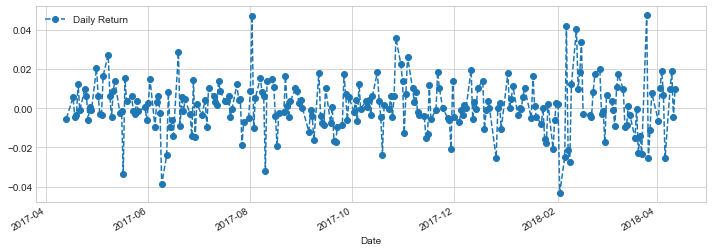

In [20]:
# Visualization of the percent change for each day of Apple stock
AAPL['Daily Return'].plot(figsize=(12,4),legend=True,linestyle='--',marker='o')

/usr/local/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


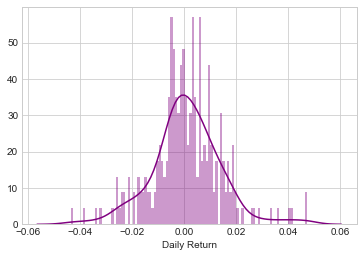

In [21]:
# Histogram to visualiza the average daily return of Apple stock
sns.distplot(AAPL['Daily Return'].dropna(),bins=100,color='purple')

In [23]:
# Calculation to grab all the closing prices for the tech stock list into one DataFrame
closing_df = web.DataReader(['AAPL','GOOG','MSFT','AMZN'],'yahoo',start,end)['Adj Close']

In [24]:
# Quick look of the data frame
closing_df.head()

,AAPL,AMZN,GOOG,MSFT
Date,,,,
2018-04-12,174.139999,1448.500000,1032.510010,93.580002
2018-04-11,172.440002,1427.050049,1019.969971,91.860001
2018-04-10,173.250000,1436.219971,1031.640015,92.879997
2018-04-09,170.050003,1406.079956,1015.450012,90.769997
2018-04-06,168.380005,1405.229980,1007.039978,90.230003


In [25]:
# Calculate the daily return percent of all stocks and store them in a new tech returns DataFrame
tech_rets = closing_df.pct_change()

/usr/local/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


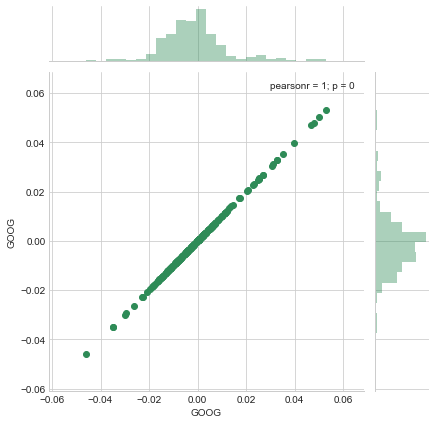

In [26]:
# Comparing Google to itself shows a perfectly linear relationship
sns.jointplot('GOOG','GOOG',tech_rets,kind='scatter',color='seagreen')

/usr/local/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


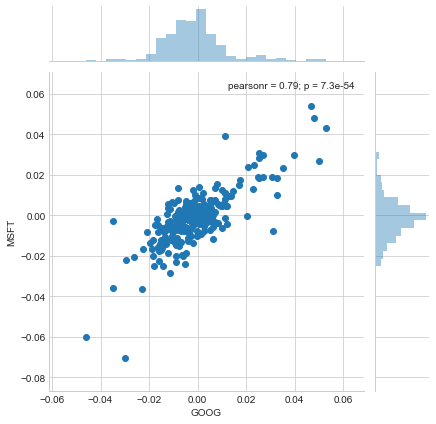

In [27]:
#Joinplot to compare the daily returns of Google and Microsoft
sns.jointplot('GOOG','MSFT',tech_rets,kind='scatter')

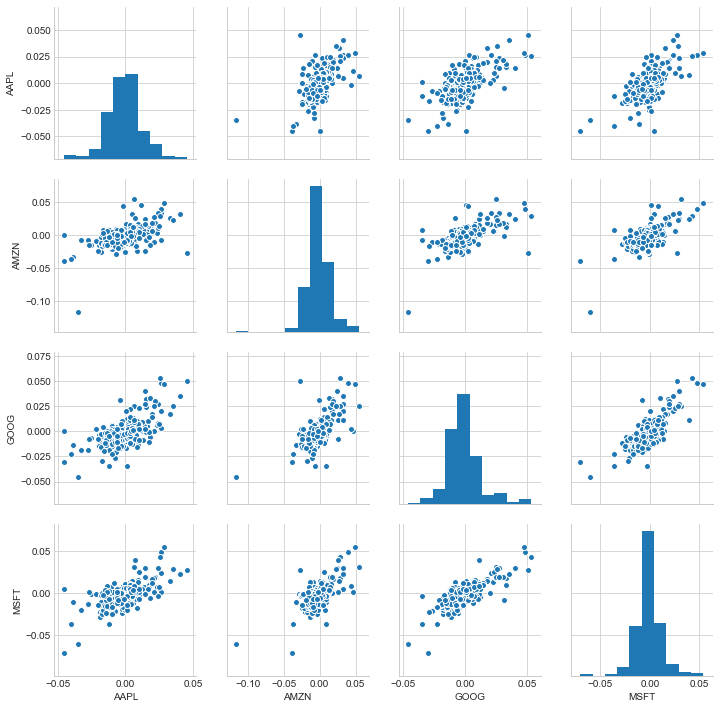

In [28]:
# Correlation analysis for every possible combination of stocks in our technology stock ticker list.
sns.pairplot(tech_rets.dropna())

/usr/local/lib/python3.6/site-packages/matplotlib/contour.py:960: UserWarning: The following kwargs were not used by contour: 'label', 'color'
  s)


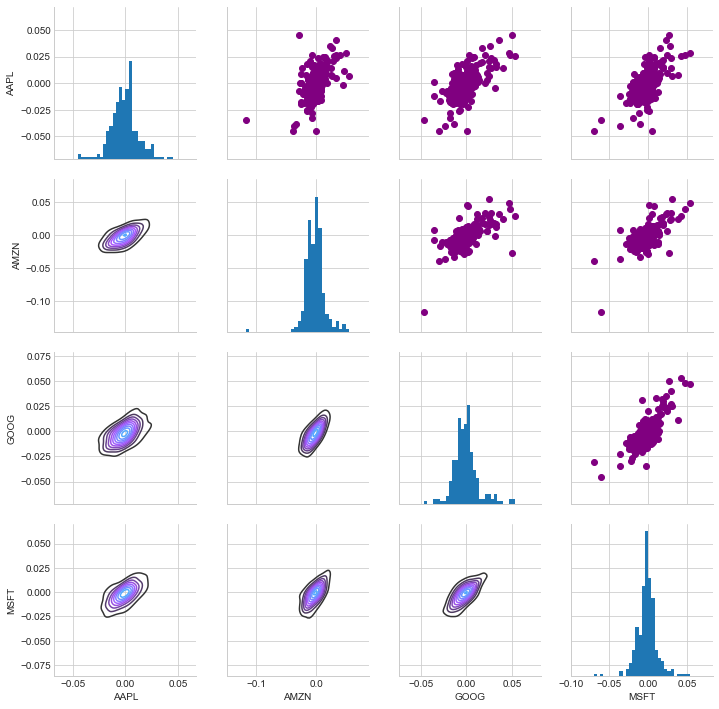

In [29]:
# Mixed plot to visualize the correlation between all technology stocks
returns_fig = sns.PairGrid(tech_rets.dropna())

returns_fig.map_upper(plt.scatter,color='purple')

returns_fig.map_lower(sns.kdeplot,cmap='cool_d')

returns_fig.map_diag(plt.hist,bins=30)

/usr/local/lib/python3.6/site-packages/matplotlib/contour.py:960: UserWarning: The following kwargs were not used by contour: 'label', 'color'
  s)


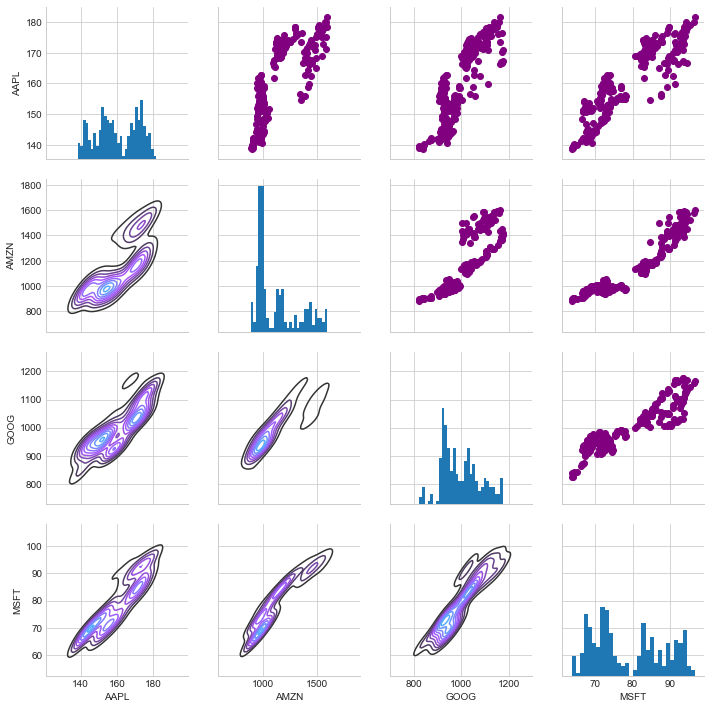

In [30]:
# Correlation analysis by using mixed types of plots for the closing price of all technology stocks
returns_fig = sns.PairGrid(closing_df)

returns_fig.map_upper(plt.scatter,color='purple')

returns_fig.map_lower(sns.kdeplot,cmap='cool_d')

returns_fig.map_diag(plt.hist,bins=30)

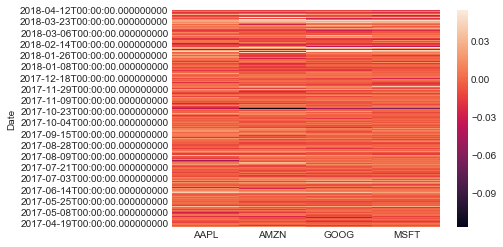

In [36]:
# Correlation plot for the daily returns of all stocks
sns.heatmap(tech_rets)

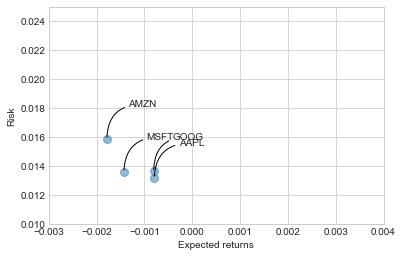

In [37]:
# Cleaning data frame by droping rows having null values
rets = tech_rets.dropna()

# Scatter plot of expected return of the stocks vs. their standard deviations of daily retunrs
area = np.pi*20

plt.scatter(rets.mean(), rets.std(),alpha = 0.5,s =area)

plt.ylim([0.01,0.025])
plt.xlim([-0.003,0.004])

plt.xlabel('Expected returns')
plt.ylabel('Risk')

for label, x, y in zip(rets.columns, rets.mean(), rets.std()):
    plt.annotate(
        label, 
        xy = (x, y), xytext = (50, 30),
        textcoords = 'offset points', ha = 'right', va = 'bottom',
        arrowprops = dict(arrowstyle = '-', connectionstyle = 'arc3,rad=0.5'))